In [1]:
## For this assignment I used help from these two sites: https://github.com/SasankYadati/wright-fisher-population-genetics-simulation/blob/master/wright_fisher-hints%20(1).md
##https://pycon.org.il/2016/static/sessions/yoav-ram.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1

In [3]:
#define allele frequnecy and population size
p0   = 0.5  
pop_size= 100

In [4]:
initial_population = np.zeros(pop_size)

#Set the frequency * intitail population to 1
initial_population[0:int(p0*pop_size)] = 1

#Shuffle the population
np.random.shuffle(initial_population)
print(initial_population)

[1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0.]


In [5]:
#Implement the Wright fisher simulation
def generation(pop):
    pop_size=len(pop)
    return np.random.choice(pop,pop_size,replace=True)
generation(initial_population)

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.])

## Step 2

Text(0, 0.5, 'population frequency')

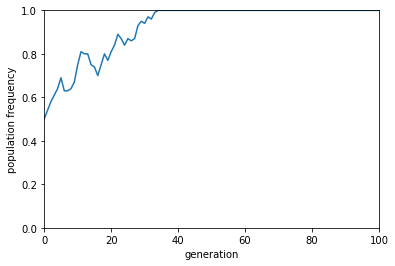

In [6]:
nGen = 100  # number of generations to simulate
history = [initial_population]  # a container list for our simulations. It will contain the population 
                                        # state after generations 0 to nGen
for i in range(nGen):
    # evolve the population for one generation
    history.append(generation(history[-1])) 
history = np.array(history) 
freqs = np.mean(history, axis=1)
plt.plot(freqs)
plt.axis([0, 100, 0, 1]);
plt.xlabel("generation")
plt.ylabel("population frequency")

## Step 3

In [7]:
#N= population size
#s= alelle frequency
#repetations= number of times the simulation was repeated 
def simulation(N, s, repetitions=1000):
    N = int(N) 
    n1 = np.ones(repetitions, dtype=np.uint64)
    T = np.empty_like(n1)
    update = (n1 > 0) & (n1 < N)
    t = 0
    
    while update.any():
        t += 1
        p = n1 * (1 + s) / (N + n1 * s) 
        n1[update] = np.random.binomial(N, p[update])
        T[update] = t
        update = (n1 > 0) & (n1 < N)

    return n1 == N, T

print("Fixate %", simulation(N=100, s=0.5)[0].mean())

Fixate % 0.585


In [8]:
%timeit simulation(N=10, s=0.01, repetitions=1000)
%timeit simulation(N=100, s=0.5, repetitions=1000)

2.72 ms ± 47.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.25 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
fixations, times = simulation(N=100, s=0.5, repetitions=1000)
fixation_prob = fixations.mean()
fixation_time = times[fixations].mean()
print("% Fixation: {:.2g}".format(fixation_prob))
print("Avg. time: {:.0f}".format(fixation_time))

% Fixation: 0.57
Avg. time: 22


/Users/cmdb/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Fixation time'), Text(0, 0.5, 'Frequency')]

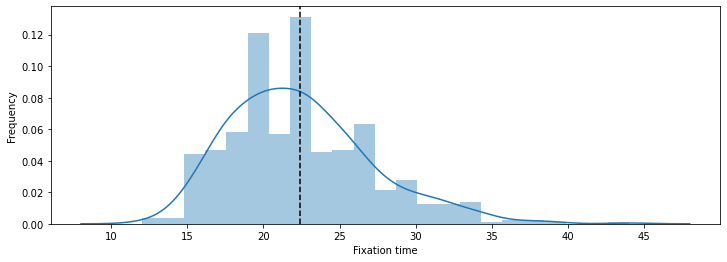

In [10]:
import seaborn as sns
w, h = plt.rcParams['figure.figsize']
fig, ax = plt.subplots(1, figsize=(2 * w, h))
sns.distplot(times[fixations])
ax.axvline(times[fixations].mean(), color='k', ls='--')
ax.set(xlabel='Fixation time', ylabel='Frequency')

## Step 4

In [11]:
#N= population size
#s= alelle frequency
#repetations= number of times the simulation was repeated 
repetitions = 1000
s = 0.5
Nrange = np.logspace(1, 6, 10, dtype=np.uint64)

def fix_time_simulation(N):
    fixations, times = simulation(N=N, s=s, repetitions=repetitions)
    fixation_time_mean = times[fixations].mean()
    fixation_time_std =  times[fixations].std(ddof=1) / np.sqrt(repetitions)
    return fixation_time_mean, fixation_time_std

fix_time_sim = np.array([
    fix_time_simulation(N=N)
    for N in Nrange])

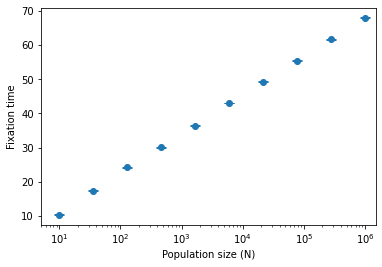

In [12]:
def fixation_time_plot(N, mean, sem):
    fig, ax = plt.subplots(1, 1)

    ax.errorbar(x=N, y=mean, yerr=sem, 
                fmt='o', capsize=5, label='Simulation')

    ax.set(
        xlabel='Population size (N)',
        ylabel='Fixation time',
        xscale='log', 
        xlim=(0.5 * Nrange.min(), 1.5 * Nrange.max()),
    )
    return fig, ax

fixation_time_plot(Nrange, fix_time_sim[:,0], fix_time_sim[:,1]);

## Step 5

In [13]:
class population:
    
    def __init__(self, nInd, p0): 
        self.nInd = nInd
        self.p0 = p0 
        #initialize the population
        self.initial_population = np.zeros(self.nInd) 
        self.initial_population[0 : int(p0*self.nInd)] = 1
        np.random.shuffle(self.initial_population)
        #history is a container that records the genotype at each generation.
        #we'll update this list 
        self.history = [self.initial_population]

    def generation(self): 
        return np.random.choice(np.array(self.history[-1]), self.nInd, replace=True) 

    def evolve(self,nGen): 
        for i in range(nGen):
            self.history.append(self.generation())
        self.getTraj()

    def getTraj(self):
        history_array = np.array(self.history)
        self.traj = history_array.mean(axis=1)  
        return self.traj

    def plotTraj(self,ax="auto"):
        plt.plot(self.traj)
        if ax=="auto":
            plt.axis([0, len(self.history), 0, 1]) 
        else:
            plt.axis(ax)

In [14]:
nInd = 100
nGen = 200
nRuns = 5
p0 = 0.5
# Create a list of length nRuns containing initial populations 
# with initial frequency p0 and nInd individuals.
pops = [population(nInd, p0) for i in range(nRuns)] 

In [15]:
for pop in pops:
    pop.evolve(nGen);  

Text(0, 0.5, 'allele frequency')

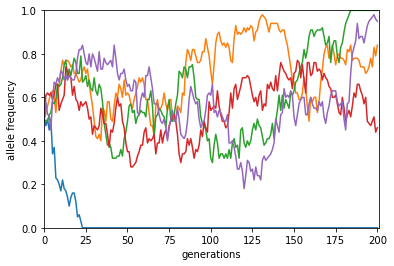

In [16]:
for pop in pops:
    pop.plotTraj();
plt.xlabel("generations")
plt.ylabel("allele frequency") 

## Step 6

In [17]:
nInd = 10
nGen = 100
nRuns = 2000
#enter the initial allele frequency for new mutations
p0 = 1/nInd
pops = [population(nInd,p0) for i in range(nRuns)] 
[pop.evolve(nGen) for pop in pops]; 

Text(0, 0.5, 'Number of simulations')

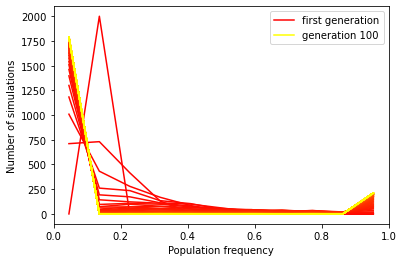

In [22]:
def frequencyAtGen(generation_number, populations, nBins=11):
    counts_per_bin, bin_edge_positions = np.histogram([pop.traj[generation_number] for pop in populations], bins=nBins, range=(0,1)) 
    
    bin_centers=np.array([(bin_edge_positions[i+1]+bin_edge_positions[i]) / 2 for i in range(len(counts_per_bin))]) 
    return bin_centers, counts_per_bin # Return the data from which we will generate the plot

nBins = nInd + 1  # We want to have bins for 0,1,2,...,N copies of the allele. 
proportion_fixed = []  # fixation rate
for i in range(nGen+1):
    x,y = frequencyAtGen(i, pops, nBins);
    if i==0:
        plt.plot(x, y, color=plt.cm.autumn(i*1./nGen), label="first generation")  # cm.autumn(i*1./nGen) returns the 
                                                                            #color with which to plot the current line
    elif i==nGen:
        plt.plot(x, y, color=plt.cm.autumn(i*1./nGen), label="generation %d"% (nGen,) )
    else:
        plt.plot(x, y, color=plt.cm.autumn(i*1./nGen))
    proportion_fixed.append((i, y[-1]*1./nRuns))
    
plt.legend()    
plt.xlabel("Population frequency")
plt.ylabel("Number of simulations")


In [20]:
print(proportion_fixed)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0005), (5, 0.003), (6, 0.0065), (7, 0.01), (8, 0.0175), (9, 0.025), (10, 0.029), (11, 0.0335), (12, 0.038), (13, 0.042), (14, 0.0465), (15, 0.0505), (16, 0.0555), (17, 0.0605), (18, 0.0645), (19, 0.0695), (20, 0.0735), (21, 0.076), (22, 0.0785), (23, 0.082), (24, 0.0855), (25, 0.0875), (26, 0.0875), (27, 0.09), (28, 0.0905), (29, 0.092), (30, 0.0935), (31, 0.096), (32, 0.097), (33, 0.097), (34, 0.0975), (35, 0.098), (36, 0.098), (37, 0.0995), (38, 0.1005), (39, 0.1005), (40, 0.1005), (41, 0.1015), (42, 0.1015), (43, 0.1025), (44, 0.104), (45, 0.104), (46, 0.104), (47, 0.104), (48, 0.104), (49, 0.104), (50, 0.104), (51, 0.104), (52, 0.104), (53, 0.104), (54, 0.104), (55, 0.104), (56, 0.1045), (57, 0.1045), (58, 0.1045), (59, 0.105), (60, 0.105), (61, 0.105), (62, 0.105), (63, 0.105), (64, 0.105), (65, 0.105), (66, 0.105), (67, 0.1055), (68, 0.1055), (69, 0.1055), (70, 0.1055), (71, 0.1055), (72, 0.1055), (73, 0.1055), (74, 0.1055), (75, 0.1

Text(0, 0.5, 'Fixation probability')

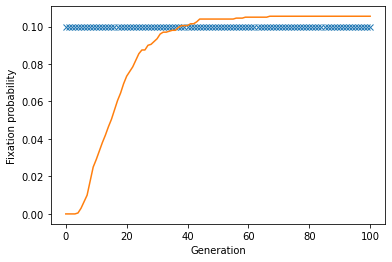

In [21]:
proportion_fixed = np.array(proportion_fixed)

fixation_probability = [p0]*(nGen+1)
plt.plot(proportion_fixed[:,0], np.array(fixation_probability), 'x', label='theory')
plt.plot(proportion_fixed[:,0], proportion_fixed[:,1], '-', label="simulation")
plt.xlabel("Generation")
plt.ylabel("Fixation probability")

#a new mutation was added as an addditional parameter to the model